**Week of October 21st Homework**

Question 1: 

The Simple Linear Regression Model is represented (generally) in slope-intercept form as: y = $B_0$ + $B_1$x + ϵ. 

In words, the Simple Linear Regression Model is used to describe the relationships between 2 variables. 

The predictor variable, which is x, is how we measure changes in y. 
The outcome variable is y, and y is what we want to predict. 

The slope coefficient ($B_1$) will tell you the change in y for every marginal increase in x. 

The intercept coefficient is the beginning point of the linear regression model (y-intercept). 

Epsilon (the error term) is the difference between the observed and predicted values of y. It accounts for the variation that can occur in y that isn't explainable through the linear relationship with the predictor variable. 

These components combine to create a normal distribution. This occurs because of an assumption made in linear regression, which is that ϵ has a normal distribution with a mean of 0 and variance of $$σ^2$$ 

Since y is a linear function of x, plus a normally distributed ϵ, the response variable is also normally distributed. 

If this is true, then for each value of x, y is drawn from a normal distribution. If we have data where each data point follows the model, then the distribution of errors will approximate a normal distribution, given that all the model's assumptions hold. 

Assumptions: 

1. Linearity (x and y have a linear relationship) 
2. Independence (residuals are independent of each other)
3. Residuals have constant variance at all x 
4. Normality (residuals are normally distributed)



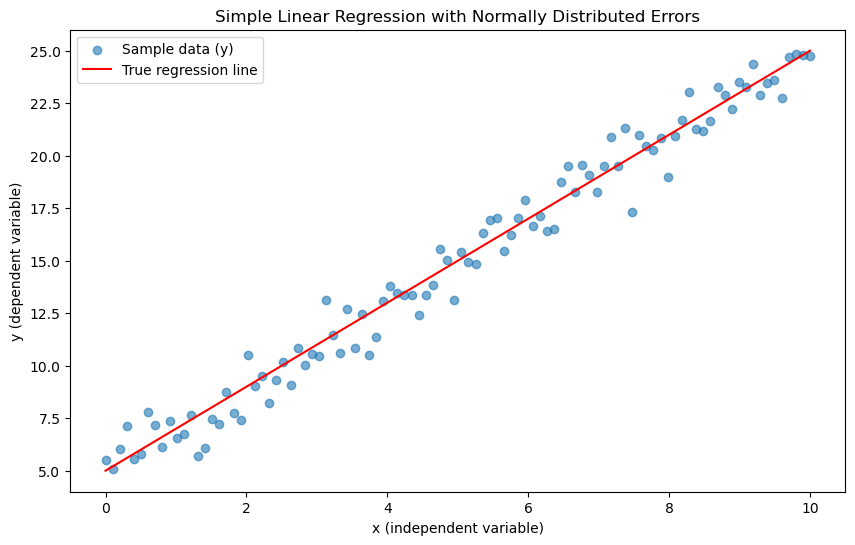

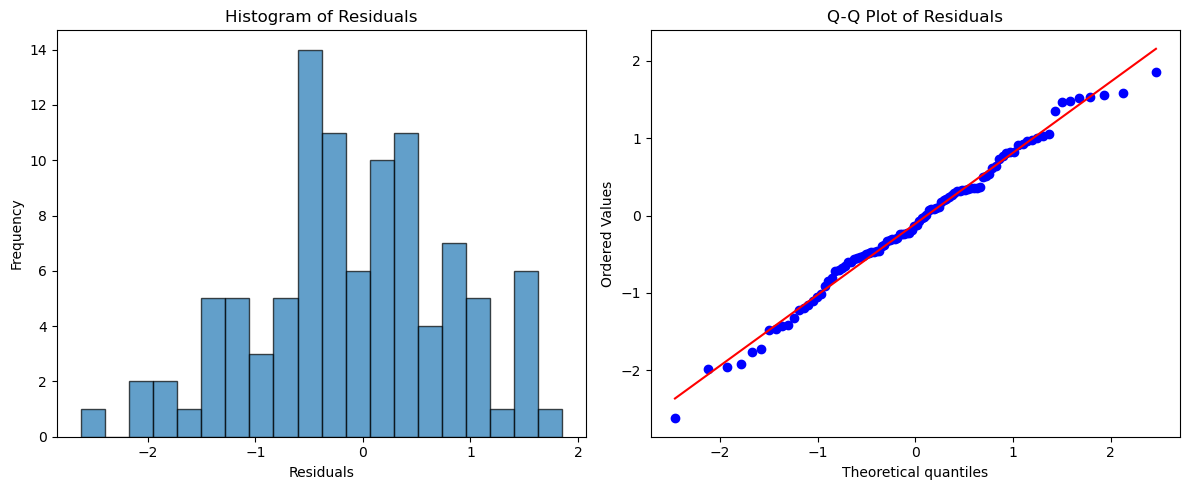

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define parameters for the true simple linear regression model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 1.0  # Standard deviation of the error term

# Step 2: Generate independent variable values (x) and normally distributed errors
np.random.seed(42)  # Seed for reproducibility
x = np.linspace(0, 10, 100)  # 100 evenly spaced values from 0 to 10
errors = np.random.normal(0, sigma, size=len(x))  # Normally distributed errors

# Step 3: Generate dependent variable (y) based on the true model
y = beta_0 + beta_1 * x + errors

# Step 4: Plot the generated sample (y) to show it is normally distributed around the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Sample data (y)", alpha=0.6)
plt.plot(x, beta_0 + beta_1 * x, color="red", label="True regression line")
plt.xlabel("x (independent variable)")
plt.ylabel("y (dependent variable)")
plt.title("Simple Linear Regression with Normally Distributed Errors")
plt.legend()
plt.show()

# Step 5: Examine distribution of residuals
residuals = y - (beta_0 + beta_1 * x)

plt.figure(figsize=(12, 5))

# Histogram of residuals (should appear approximately normal)
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Q-Q plot to test normality of residuals
from scipy import stats
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()


Question 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4146.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           5.23e-82
Time:                        04:24:15   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8272      0.181     26.667      0.0

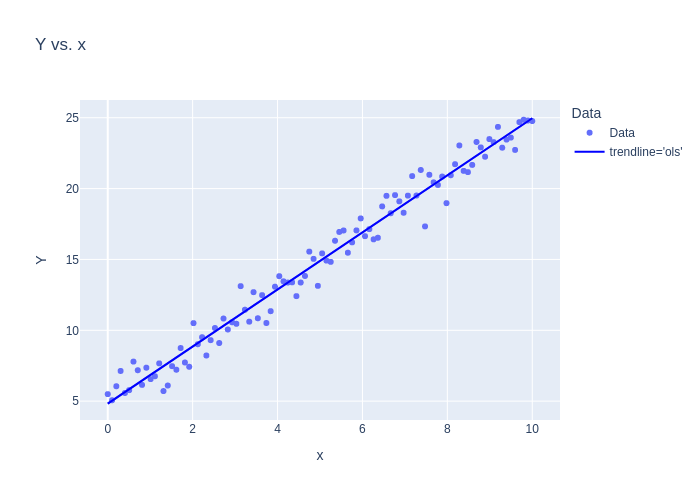

In [29]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px

# Create a DataFrame with x and Y data
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 100)  # Generate 100 evenly spaced values from 0 to 10
epsilon = np.random.normal(0, 1, 100)  # Random noise sampled from a normal distribution
Y = 5 + 2 * x + epsilon  # Linear relationship with intercept 5, slope 2, and normally distributed errors

# Create the DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Specify and fit a simple linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # Create a linear model specifying Y as dependent on x
fitted_model = model_data_specification.fit()  # Fit the model using Ordinary Least Squares

# Display the summary of the fitted model
print(fitted_model.summary())  # Comprehensive summary including coefficients, standard errors, etc.
print(fitted_model.summary().tables[1])  # Display the table with regression coefficients and statistics
print(fitted_model.params)  # Estimated parameters (intercept and slope)
print(fitted_model.params.values)  # Values of the estimated parameters as a NumPy array
print(fitted_model.rsquared)  # R-squared value representing model fit

# Add a column to ensure data points are labeled in the legend
df['Data'] = 'Data'  # Adds a column 'Data' with every row set to 'Data'

# Create a scatter plot with a linear regression trendline using plotly.express
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Scatter plot with a fitted trendline (OLS regression)

# Manually add a trendline from the fitted model to the figure
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")  # Adds a manual trendline for comparison

fig.show(renderer="png")  # Display the figure
# Use fig.show(renderer="png") for GitHub and MarkUs submissions to generate static images


Question 3:

The purpose of this code is to ascertain and explain the relationship between x and y through linear regression. This graph is an illustration of how well the lienar model does in explaining y's variability based on changes in x. 

1. The code uses synthetic data for x and y and includes random noise to simulate a common scenario in regression analysis, where we seek to understand the impact of x on y. 

2. Fitting the model helps us assess the strength of the relationship between x and y. 

3. Then, the code provides a statistical summary, which includes the model's parameter (interscept and slope coefficient), epsilon, t-values, p-values, and $$R^2$$ value (which indicates strength of correlation between x and y). 

4. Adding the custom trendline by potential additional code (listed in HW) allows me to have more contorl over appearance and line regression parameters. Further, the custom trendline allows me to illustrate an expected or theorhetical relationship based on specific parameter values. 

Question 4:

1. When fitting a linear regression model, it estimates the parameters $B_0$ and $B_1$ based on the data. 
2. Using the fitted model, you can access the fitted (estimated) parameters: 
   (a) fitted_model.params[0] corresponds to $B_0$
   (b) fitted_model.params[1] corresponds to $B_1$
   
3. Using the fitted line, you can find fitted values which represent the predicted values for each observation in your dataset
4. You can see estimated parameters alongside their standard errors, t and p-values using fitted_model.summary().tables[1].

Question 5:

This line that was chosen is the one that minimizes the sum of the squared differences between observed values and predicted values. The code finds the line of best fit by adjusting parameters until the squared differences are all as small as possible. 

Squaring is important for two reasons: 
1. Squaring the residuals ensures both positive and negative differences contribute positively to the total error. Otherwise, errors would cancel out and would not accurately reflect the size of the deviations from the fitted line. 

2. Squaring amplifies larger error residuals in comparison to their small counterparts, so the method in the code (OLS) gives greater weight to predicted values far away from the fitted lines. 


Question 6:

1. Expression number 1 is the proportion of variation in Y, described by the fitted model, with a higher value indicating a better fit. 
2. fitted_model.rsquared is a direct measure of the model's explanatory power and accuracy
3. The two np.corrcoef(...) functions capture the linear relationship between observed and predicted values, and between y and x, which quantifies how well each variable explains the variance in y. 

Question 7:

There are two assumptions at play here: 

1. Linearity: The relationship between the amount of fertilizer and the crop yield should be linear. 

   (a) However, there are instance where this linear relationship is disputed: particularly at higher levels of fertilizer. The scatter plot is might show a nonlinear relationship which means the increase in yield coupld plateau or decrease after a certain amount of fertilizer in added. 
   
2. The residuals will have a constant variance at all levels of x. 

   (a) In the data, if more fertilizer leads to variable crop yields, then this variance is not constant and this assumption is violated. 

**Week of November 4th Homework**

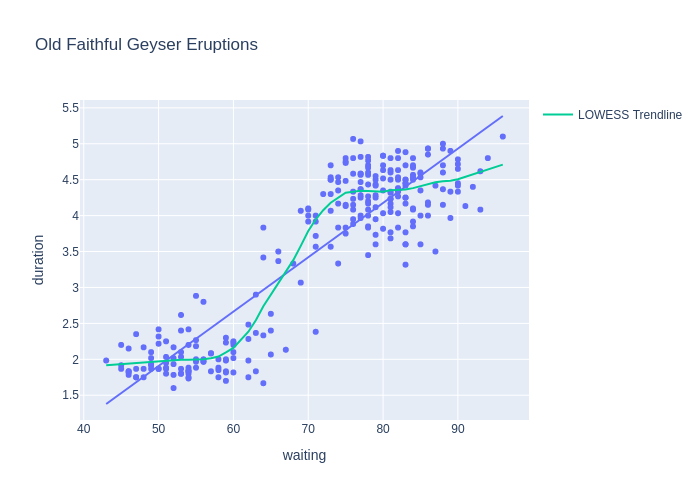

In [30]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 8: 

The null hypothesis is $H_0$ : $B_1$ = 0, where $B_1$ is the coefficient of the independent variable "waiting". 

In words, this means that there is no linear association between the waiting time between eruptions and the duration of the eruptions. Changes in waiting time (x) do not lead to changes in duration of eruptions (y). 

To use the code to characterize the evidence in the data relative to the null hypothesis, an examination of the p-value is required for the waiting coefficient in the model summary. 



In [31]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:24:16   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values (found in P > |t|) is less than 0.001, at a value of 0.00, so as a result there is very strong evidence against the null hypothesis. 

Question 9: 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


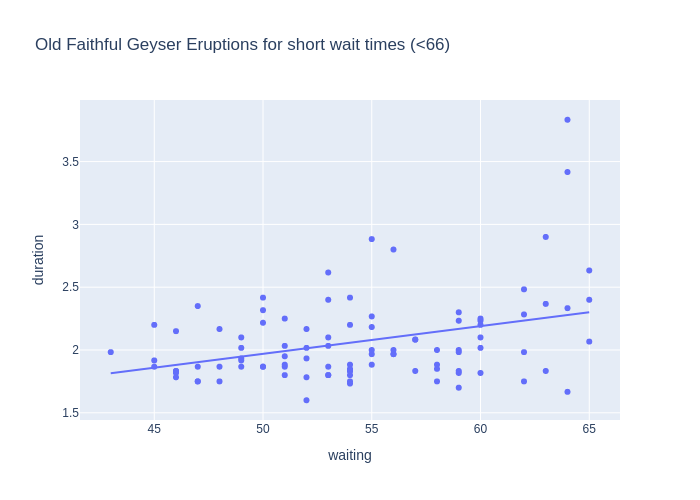

In [32]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

62: There is not enough evidence to reject the null hypothesis here because waiting's p-value (0.238) is > 0.05.

64: There is moderate evidence against the null hypothesis since 0.05>= 0.036 > 0.01. 

65: There is very strong evidence against the null hypothesis since 0.001 >= 0.000. 


Question 10:

Creating a Fitted Simple Linear Regression Model for Bootstrap Samples 

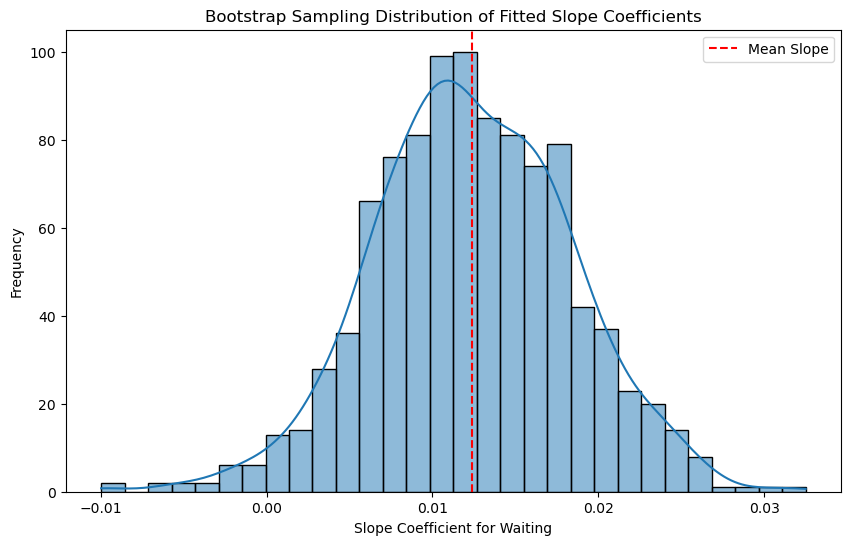

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px
import matplotlib.pyplot as plt

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define a function to create bootstrap samples and collect slope coefficients
def bootstrap_slope(data, n_bootstrap=1000):
    slopes = []
    for _ in range(n_bootstrap):
        sample = data.sample(frac=1, replace=True)  # Bootstrap sample
        model = smf.ols('duration ~ waiting', data=sample).fit()
        slopes.append(model.params['waiting'])
    return slopes

# Filter for long wait times
long_wait_limit = 71
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]

# Create bootstrap slopes
bootstrap_slopes = bootstrap_slope(long_wait)

# Visualize the bootstrap sampling distribution of fitted slopes
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_slopes, bins=30, kde=True)
plt.title('Bootstrap Sampling Distribution of Fitted Slope Coefficients')
plt.xlabel('Slope Coefficient for Waiting')
plt.ylabel('Frequency')
plt.axvline(np.mean(bootstrap_slopes), color='red', linestyle='--', label='Mean Slope')
plt.legend()
plt.show()


Simulate Samples from a Simple Linear Regression Model 

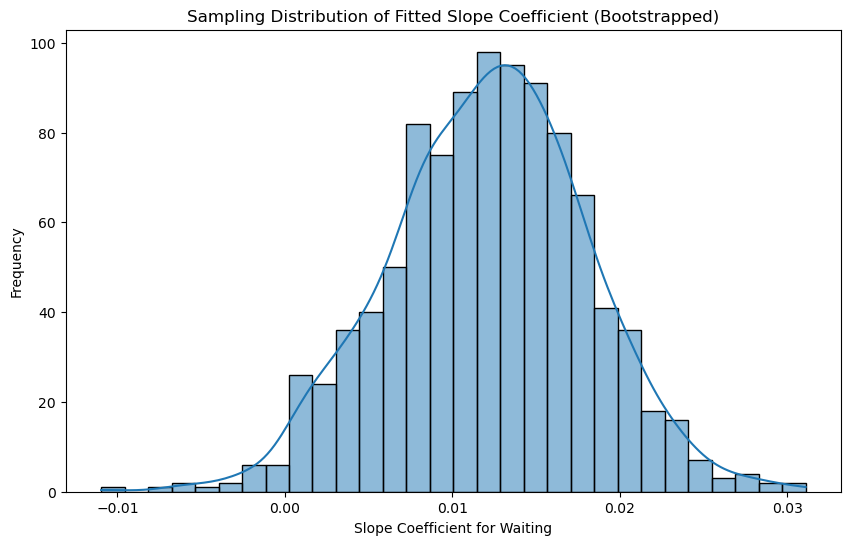

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Simulate long wait time condition (from the full data)
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Store the number of bootstrap samples
n_bootstraps = 1000
slope_coeffs = []

# Repeat the process of bootstrapping
for i in range(n_bootstraps):
    # Create a bootstrap sample
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    
    # Fit the regression model
    model_bootstrap = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Store the fitted slope coefficient
    slope_coeffs.append(model_bootstrap.params['waiting'])

# Convert the list of slope coefficients to a numpy array
slope_coeffs = np.array(slope_coeffs)

# Visualize the sampling distribution of the fitted slope coefficients
plt.figure(figsize=(10, 6))
sns.histplot(slope_coeffs, bins=30, kde=True)
plt.title('Sampling Distribution of Fitted Slope Coefficient (Bootstrapped)')
plt.xlabel('Slope Coefficient for Waiting')
plt.ylabel('Frequency')
plt.show()


Using For Loops to Collect Fitted Slopes from Multiple Samples 

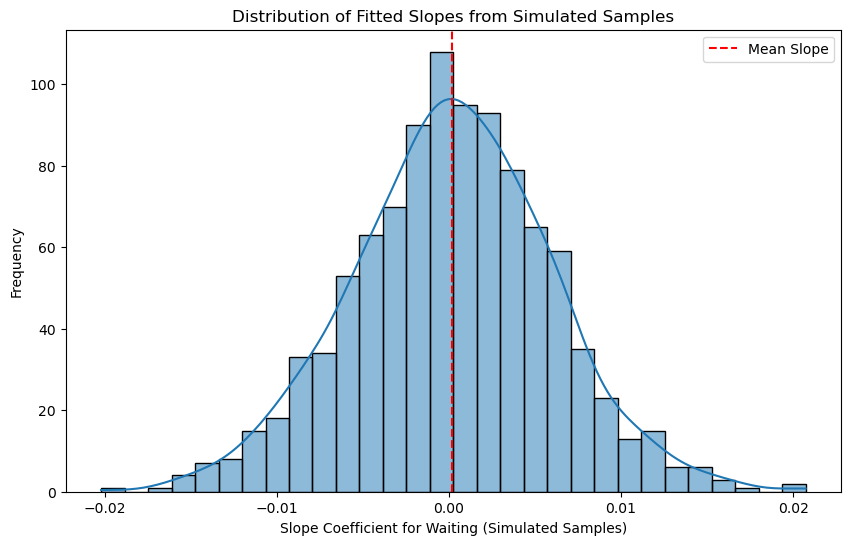

In [35]:
# Collect slopes from multiple simulated samples
def collect_slopes(n_samples=1000, sample_size=160, B0=1.65, B1=0, sigma=0.37):
    slopes = []
    for _ in range(n_samples):
        waiting_simulated, duration_simulated = simulate_data(n=sample_size, B0=B0, B1=B1, sigma=sigma)
        simulated_data = pd.DataFrame({'waiting': waiting_simulated, 'duration': duration_simulated})
        model_simulated = smf.ols('duration ~ waiting', data=simulated_data).fit()
        slopes.append(model_simulated.params['waiting'])
    return slopes

# Collect slopes from 1000 simulated samples
simulated_slopes = collect_slopes()

# Visualize the distribution of simulated slopes
plt.figure(figsize=(10, 6))
sns.histplot(simulated_slopes, bins=30, kde=True)
plt.title('Distribution of Fitted Slopes from Simulated Samples')
plt.xlabel('Slope Coefficient for Waiting (Simulated Samples)')
plt.ylabel('Frequency')
plt.axvline(np.mean(simulated_slopes), color='red', linestyle='--', label='Mean Slope')
plt.legend()
plt.show()


Creating simulated Long Wait Times Dataset Under Null Hypothesis

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5705      0.440      5.837      0.000       1.701       3.440
waiting       -0.0114      0.005     -2.107      0.037      -0.022      -0.001


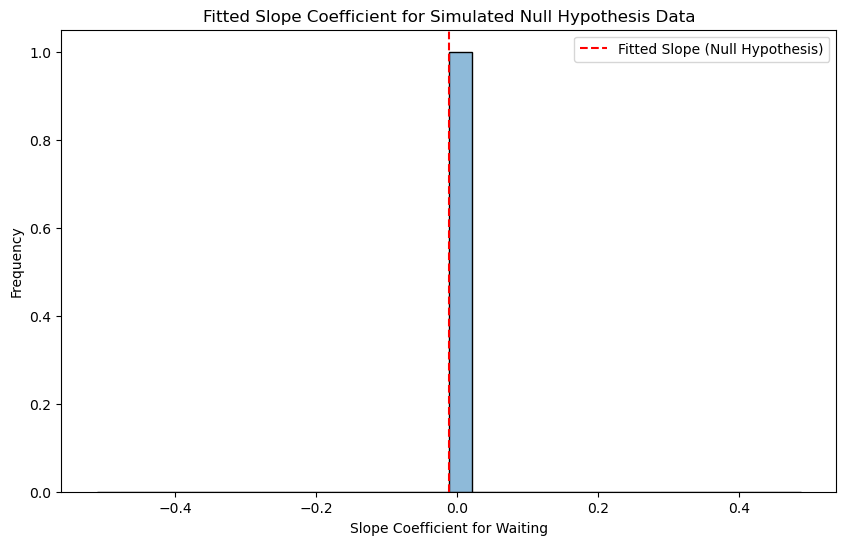

In [36]:
# Ensure long_wait is a boolean Series
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit  # boolean condition for long wait times

# Now, create a simulated version of the "long wait times" dataset
old_faithful_simulation = old_faithful[long_wait].copy()  # Use the boolean Series to filter data

# Simulate 'duration' based on null hypothesis assumptions
old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + np.random.normal(loc=0, scale=0.37, size=len(old_faithful_simulation))

# Fit the model to the simulated dataset
model_simulated_null = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()

# Show the model summary
print(model_simulated_null.summary().tables[1])

# Visualize the fitted slope coefficient for this simulated null hypothesis data
slope_null = model_simulated_null.params['waiting']
plt.figure(figsize=(10, 6))
sns.histplot([slope_null], bins=30, kde=True)
plt.title('Fitted Slope Coefficient for Simulated Null Hypothesis Data')
plt.xlabel('Slope Coefficient for Waiting')
plt.ylabel('Frequency')
plt.axvline(slope_null, color='red', linestyle='--', label='Fitted Slope (Null Hypothesis)')
plt.legend()
plt.show()


Question 11:

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


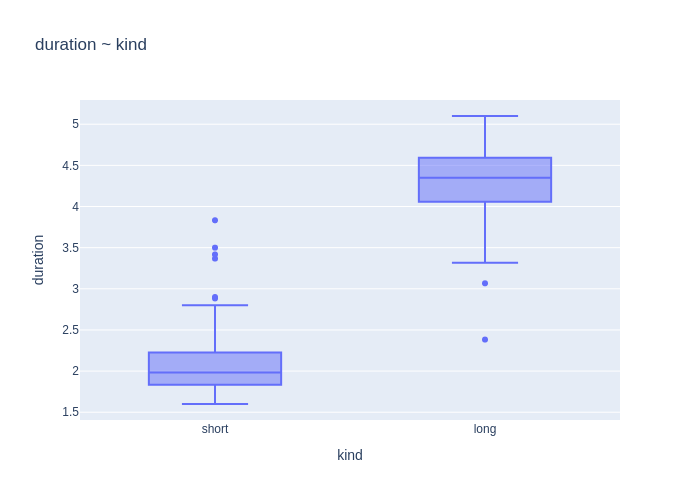

In [37]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Some differences between this and the previous model are as following:

1. This new model uses a dummy variable to classify waiting times into two distinct categories: Short is defined as < 68 minutes, and "long" is > 68 minutes. 

    (a) This approach allows for a direct comparison of means between the two groups. It also focuses on whether there is a statistically significant difference in eruption durations based on wait time. 
    
2. The coefficient associated with long waiting times represents the average difference in eruption duration between long and short categories. 

3. The previous continuous models assume linearity, whereas the new model captures potential differences between groups without assuming linearity. 

4. Statistical testing is simpler with this new model, whereas while you could conduct statistical testing on the previous model, it required a bit more complex work. 

5. Box plots illustrate the mean durations for each group and the distribution of eruption durations within each category. 


There is very strong evidence against the null hypothesis, because the indicator variable has a p-value of 0.000. According to the table, a p-value less than or equal to 0.001 provides very strong evidence against the null hypothesis. 

Question 12

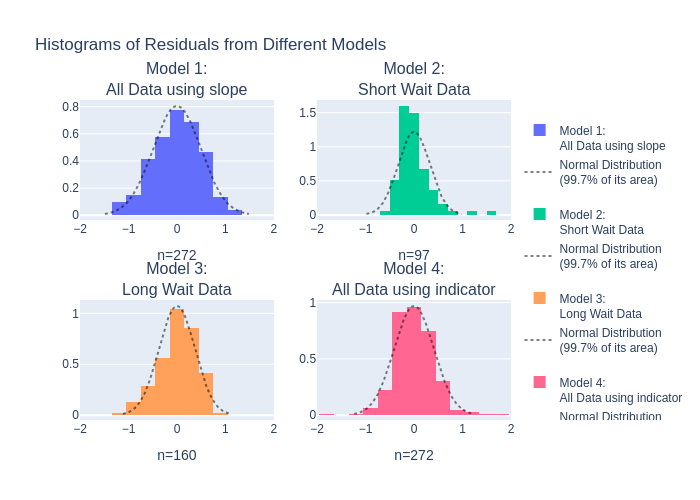

In [38]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSION

Model 1: Plausiblity that the distribution of error terms is normal is high because it most fits a normal distribution curve

The rest of the models do not have error terms that follow normal distribution because for models 2 and 3, they are skewed, and model 4 does not have enough samples (I think because it's not quite as normally distributed as Model 1 yet)

Question 13: 

**Permutation Test**

Observed difference in means: -2.2036002325581396
P-value from permutation test: 0.0


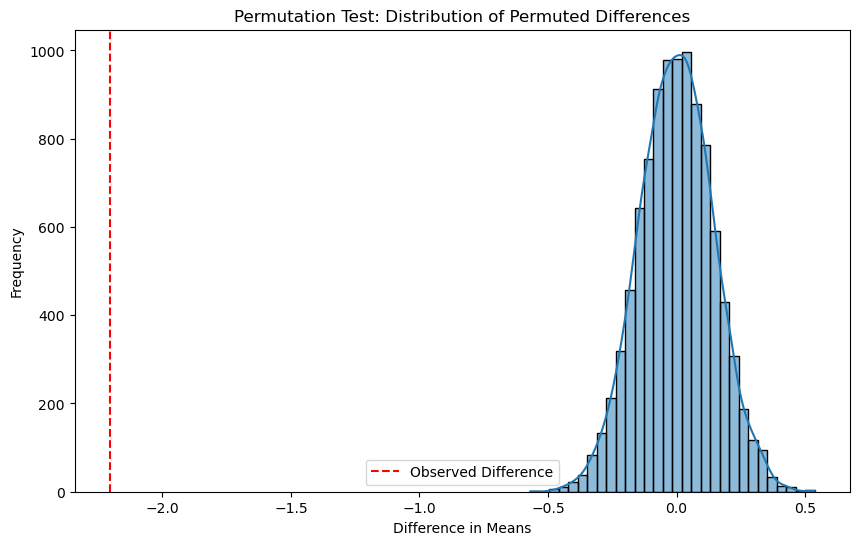

In [39]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create the 'kind' column based on waiting times
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Separate the duration data into two groups
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration']
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration']

# Observed difference in means
observed_diff = short_durations.mean() - long_durations.mean()

# Number of permutations
n_permutations = 10000
permuted_diffs = []

# Perform permutation test
combined = np.concatenate([short_durations, long_durations])
for _ in range(n_permutations):
    np.random.shuffle(combined)  # Shuffle the combined data
    new_short = combined[:len(short_durations)]  # Create new short group
    new_long = combined[len(short_durations):]  # Create new long group
    permuted_diff = new_short.mean() - new_long.mean()  # Calculate difference
    permuted_diffs.append(permuted_diff)

# Calculate p-value
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")

# Plot the distribution of permuted differences
plt.figure(figsize=(10, 6))
sns.histplot(permuted_diffs, bins=30, kde=True)
plt.axvline(observed_diff, color='red', linestyle='--', label='Observed Difference')
plt.title('Permutation Test: Distribution of Permuted Differences')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Bootstrap Interval**

Permutation Test

Observed difference in means: -2.2036002325581396
P-value from permutation test: 0.0


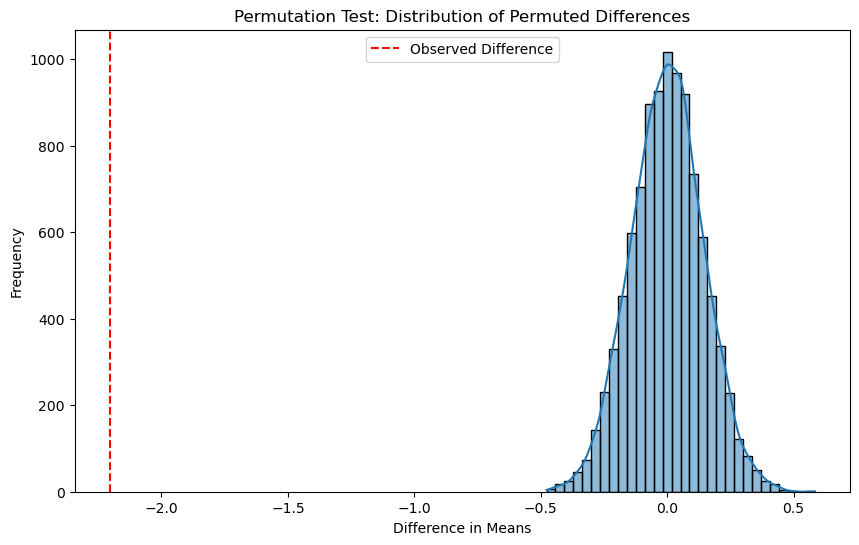

In [40]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Old Faithful geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create the 'kind' column based on waiting times
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Separate the duration data into two groups
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration']
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration']

# Observed difference in means
observed_diff = short_durations.mean() - long_durations.mean()

# Number of permutations
n_permutations = 10000
permuted_diffs = []

# Perform permutation test
combined = np.concatenate([short_durations, long_durations])
for _ in range(n_permutations):
    np.random.shuffle(combined)  # Shuffle the combined data
    new_short = combined[:len(short_durations)]  # Create new short group
    new_long = combined[len(short_durations):]  # Create new long group
    permuted_diff = new_short.mean() - new_long.mean()  # Calculate difference
    permuted_diffs.append(permuted_diff)

# Calculate p-value
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")

# Plot the distribution of permuted differences
plt.figure(figsize=(10, 6))
sns.histplot(permuted_diffs, bins=30, kde=True)
plt.axvline(observed_diff, color='red', linestyle='--', label='Observed Difference')
plt.title('Permutation Test: Distribution of Permuted Differences')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Bootstrap Confidence Interval 

95% Bootstrap Confidence Interval for the Difference in Means: (-2.297687750000001, -2.100604162790698)


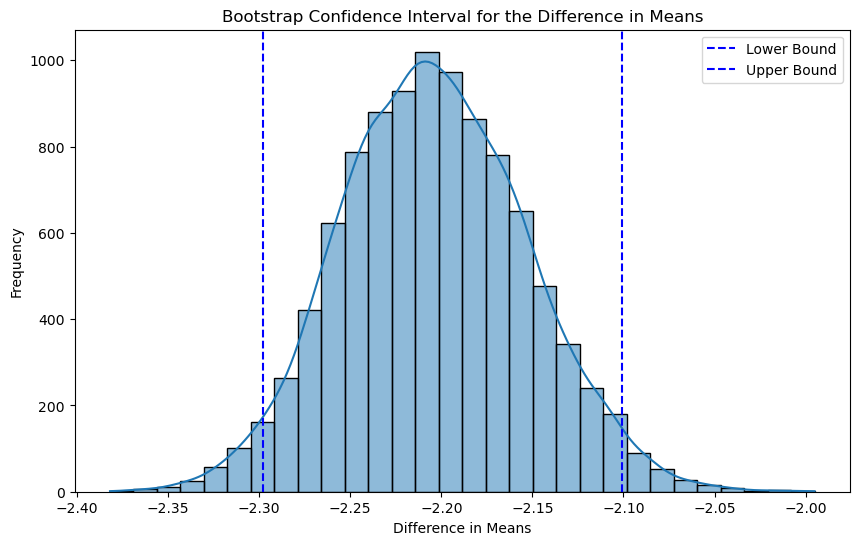

In [41]:
# Function to compute the bootstrap confidence interval for the difference in means
def bootstrap_diff_means(data1, data2, n_bootstrap=10000, alpha=0.05):
    diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        diffs.append(sample1.mean() - sample2.mean())
    
    lower_bound = np.percentile(diffs, 100 * alpha / 2)
    upper_bound = np.percentile(diffs, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

# Calculate the bootstrap confidence interval
bootstrap_ci = bootstrap_diff_means(short_durations, long_durations)
print(f"95% Bootstrap Confidence Interval for the Difference in Means: {bootstrap_ci}")

# Plot the distribution of bootstrap differences
bootstrap_diffs = []
for _ in range(10000):
    sample_short = np.random.choice(short_durations, size=len(short_durations), replace=True)
    sample_long = np.random.choice(long_durations, size=len(long_durations), replace=True)
    bootstrap_diffs.append(sample_short.mean() - sample_long.mean())

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, bins=30, kde=True)
plt.axvline(bootstrap_ci[0], color='blue', linestyle='--', label='Lower Bound')
plt.axvline(bootstrap_ci[1], color='blue', linestyle='--', label='Upper Bound')
plt.title('Bootstrap Confidence Interval for the Difference in Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Sampling Approaches Work for the Two Simulations

1. The permutation test reshuffles waiting times to create a simulation of the null hypothesis. Then, it calculates the observed difference and compares it against the distribution of permuted differences and the p-value is obtained.

2. The bootstrapping process involves resampling with replacement n-times from each group to create a distribution of bootstrapped differences in means. The confidence interval (95%) is calculated using percentiles from this distribution. 

Similarities: 
1. Both have the same goal: to compare the means of short and long waiting times in the Old Faithful Geyser 

2. They do not rely on assumptions about the underlying distribution of the data  (non-parametric) 

3. Both methods provide insight into the differences between groups. Permutation test gives you p-value of significance, while box plot visually shows IQR, median, and potential outliers within each group.

4. Both provide support for hypothesis testing
    (a) Permutation test directly tests null hypothesis 
    (b) Box plot can support visual interpretations of this hypothesis by illustrating whether the medians of the groups differ

Differences: 

1. Permutation test involves shuffling the labels of the data points and calculating the difference in means multiple times to create a distribution under the null hpypothesis. The box plot does not perform any statistical testing by itself but summarizes the distribution of the duration for each group: median, IQR, and outliers are shown. 

2. Permutation test gives you more statistical inference about the data compared to a box plot which is a descriptive tool for visual comparisons. 

3. Both are interpreted differently: Permutation test is interpreted through the p-value, and the box-plot is visual and suggests differences but does not confirm significance without additional testing. 

Question 14 

Yes 

ChatGPT Summary: (link: ERROR IN PROVIDING LINK) 

Here’s a summary of our discussion in this chat:

1. Linear Regression Analysis:

    (a) We started with fitting simple linear regression models on the Old Faithful geyser dataset to analyze the relationship between wait times and eruption durations. This included examining differences between "short" and "long" wait times and comparing model outputs, such as coefficients and p-values.
    
2. Model Assumptions and Error Distributions:

    (a) We discussed the importance of normality in the residuals and how to evaluate this assumption by looking at histograms of residuals for various models. We covered identifying deviations from normality (such as skewness or bimodality) and understanding how they affect model validity.
    
3. Permutation Test and Bootstrap Confidence Interval:

    (a) You explored two statistical methods to compare mean eruption durations for "short" and "long" wait times:
    1. Permutation Test: This non-parametric test shuffles labels between groups to simulate the null hypothesis and calculates a p-value based on the distribution of permuted differences in means.
    2. Bootstrap Confidence Interval: This method resamples each group to construct a confidence interval for the difference in means, indicating whether zero falls within the interval to suggest no difference.

4. Comparison of Permutation Test and Indicator Variable Model:

    (a) We compared the permutation test and the indicator variable-based model (visualized with box plots):
    
    1. Similarities: Both methods assess differences between groups, focus on comparing central tendency, and are somewhat non-parametric.
        
    2. Differences: The permutation test is a formal statistical test with a p-value, while the box plot is descriptive and visual. The permutation test is suited for hypothesis testing, while the box plot offers quick visual insights but lacks statistical inference.
    
5. Summary of Methods:

    (a) We reviewed how each approach serves different purposes:
      1. Permutation Test and Bootstrap Confidence Interval offer robust, non-parametric options for testing and estimating differences in group means.
      2. The indicator variable model in regression provides an estimate of mean differences through coefficients and p-values, especially when assumptions about linearity and residual normality hold.
      
This chat provided a comprehensive comparison of methods to analyze group differences, from visual tools (box plots) to statistical tests (permutation and bootstrap), giving you flexibility in choosing the approach that best fits your data and objectives.

**The error in providing link is given in the screenshot below, unsure what to do about it.**

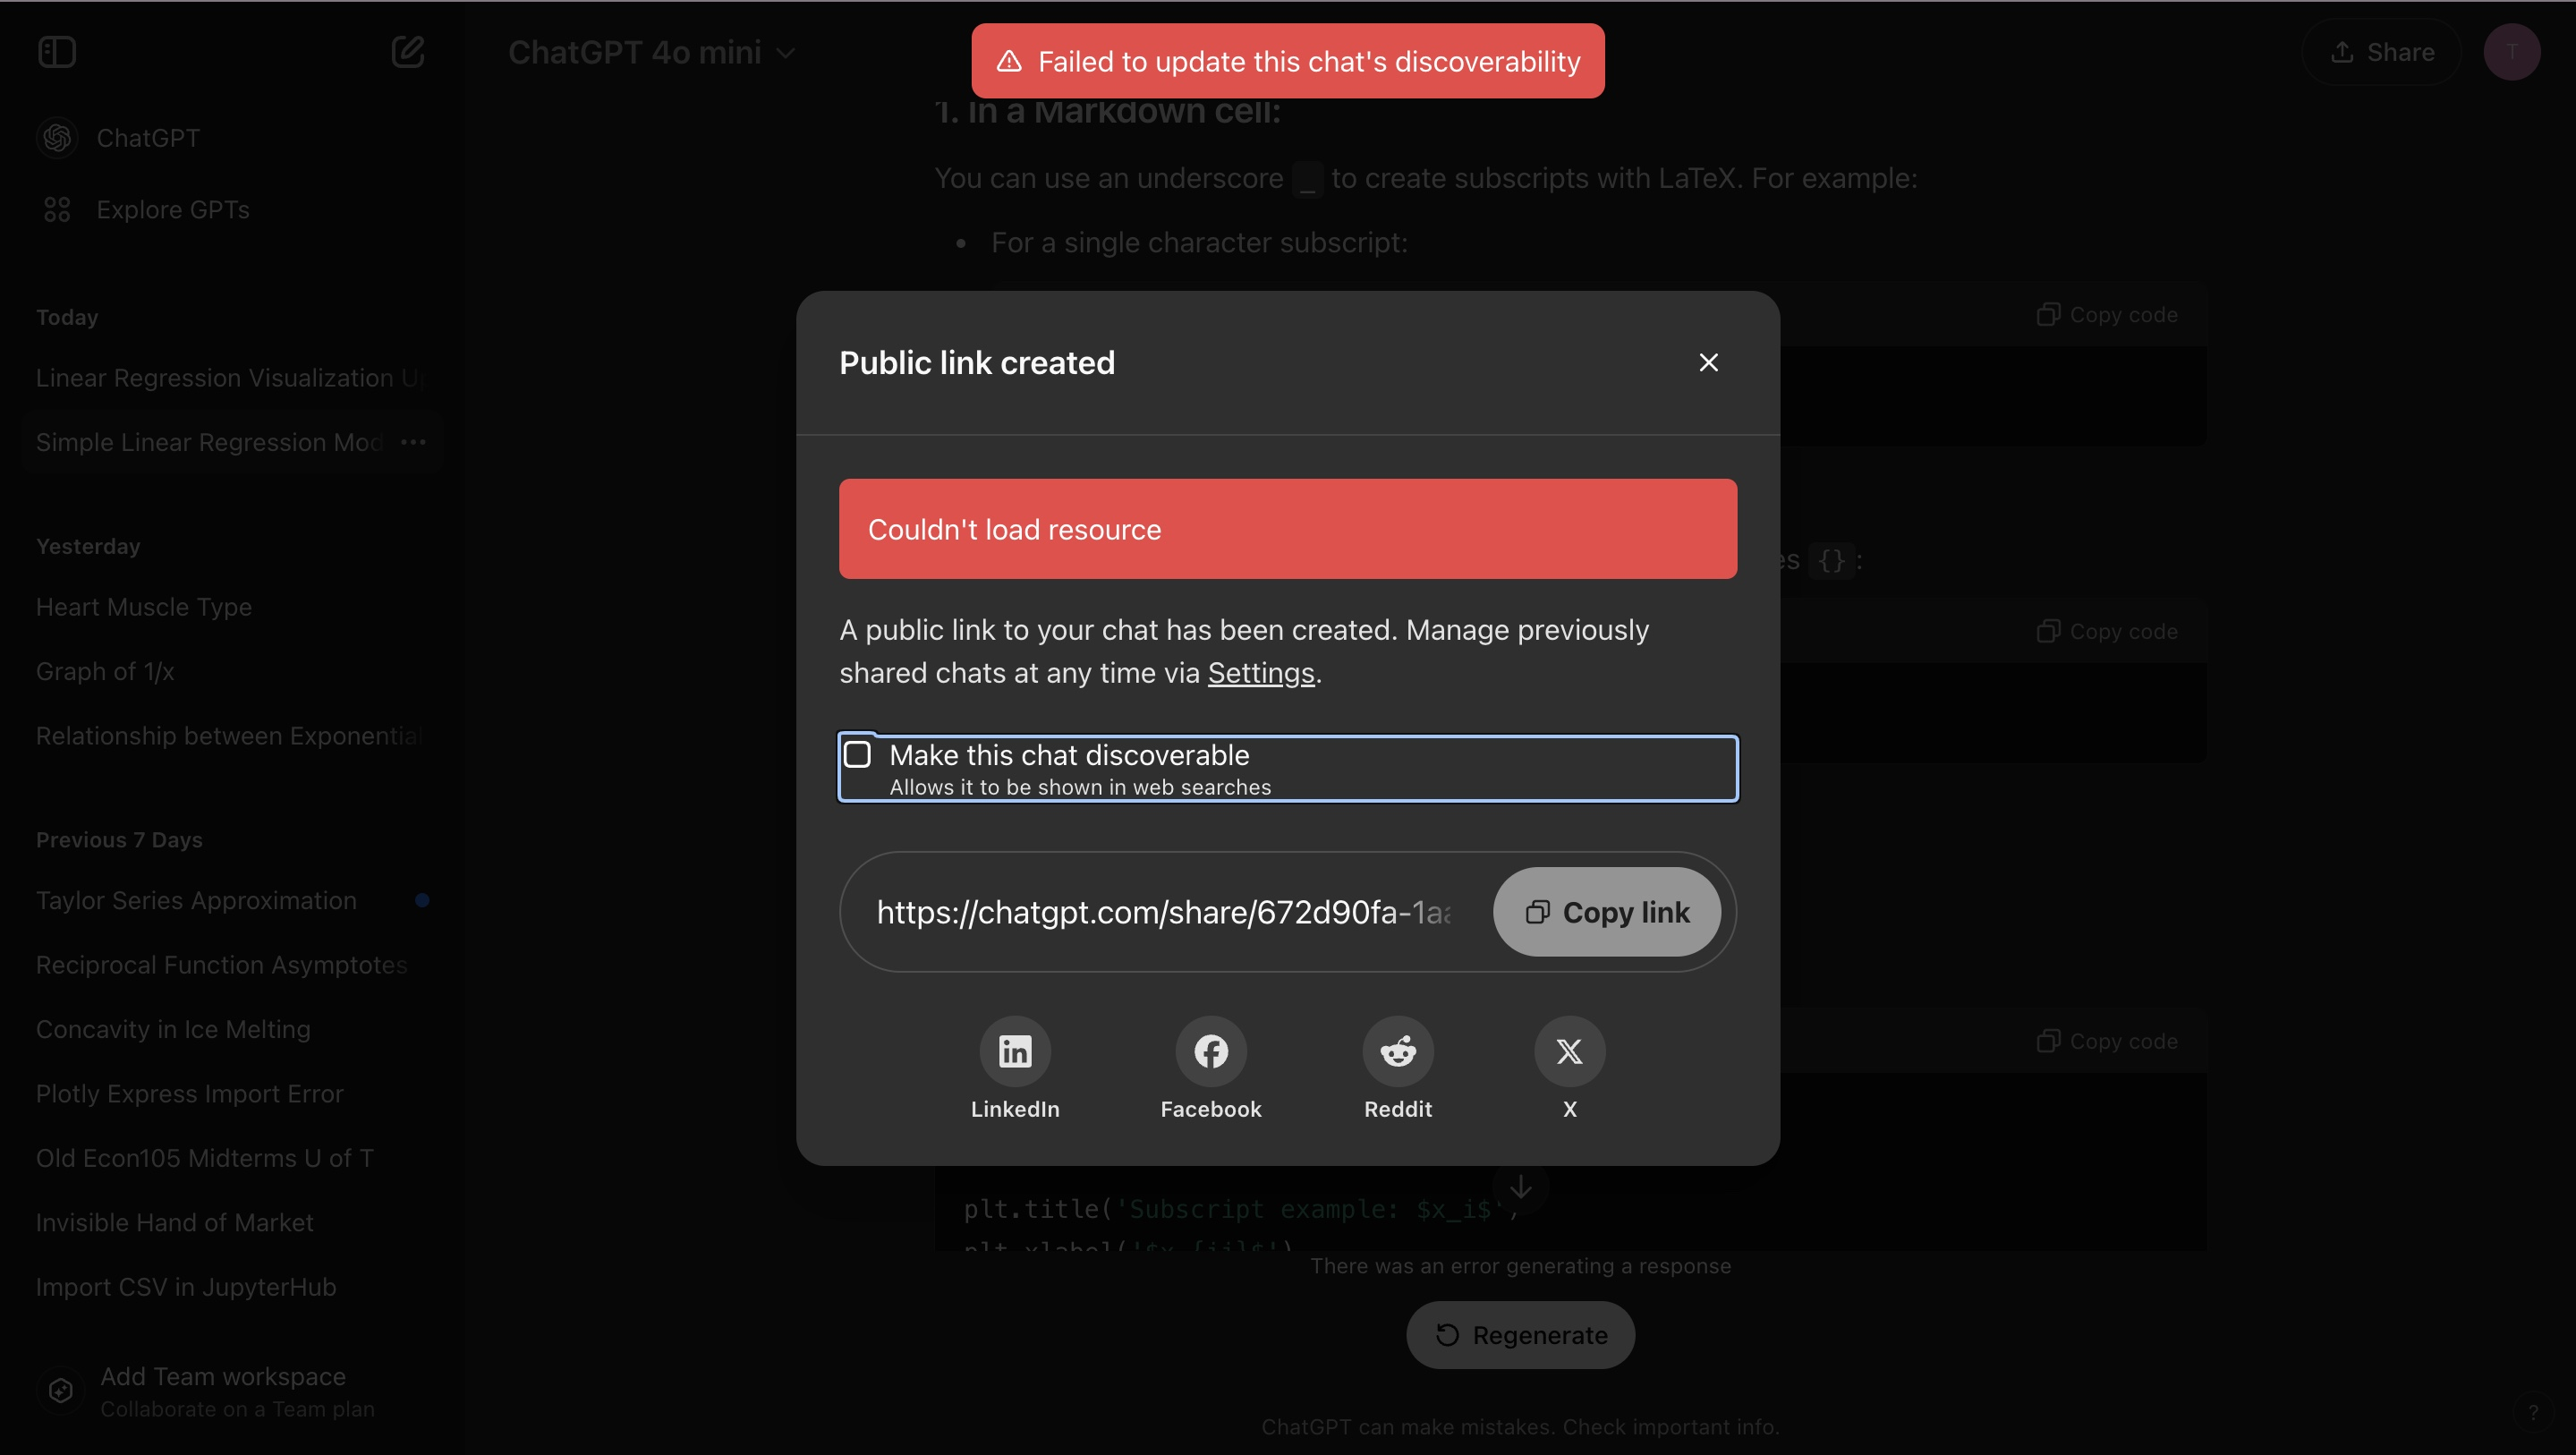